Exercise 1 and 2:


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

Use one-sided finite differences to compute an approximation to the first derivative of $g(p)=$ $0.5 p^{-0.5}+0.5 p^{-0.2}$ at $p=1.5$. Let the increment $\epsilon$ in the finite differences range across all the values in the set $\left\{10^{-1}, 10^{-2}, \ldots, 10^{-10}\right\}$. For which value of $\epsilon$ the approximate first derivative the most accurate? Repeat the third problem using two-sided finite differences to approximate the first derivative

In [86]:
def g(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2)

In [87]:
def OSD(p, Δ):
    return (g(p+Δ) - g(p))/ Δ 

In [88]:
def TSD(p, Δ):
    return (g(p+Δ) - g(p-Δ))/ (2*Δ) 

In [89]:
OSD = np.vectorize(OSD)
TSD = np.vectorize(TSD)

In [90]:
ϵ= 10**(-1* np.linspace(1,10,10))
p_point = np.linspace(1,1,10) * 1.5
truth = -(0.5**2) * 1.5**(-1.5) - 0.5 * 0.2 * 1.5**(-1.2)

In [91]:
error_OSD = OSD(p_point, ϵ) - truth
error_TSD = TSD(p_point, ϵ) - truth

In [92]:
np.abs(error_OSD), np.abs(error_TSD)

(array([8.79174498e-03, 9.21355323e-04, 9.25811321e-05, 9.26259451e-06,
        9.26308407e-07, 9.26752449e-08, 9.85260723e-09, 8.74238421e-09,
        1.34620763e-08, 2.08582529e-07]),
 array([4.99911551e-04, 4.98240048e-06, 4.98223799e-08, 4.98557140e-10,
        6.17320084e-12, 2.83776891e-11, 1.39399992e-10, 3.19126908e-09,
        1.34620763e-08, 3.46528984e-07]))

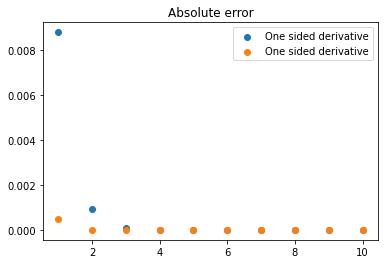

In [93]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10), np.abs(error_OSD), label="One sided derivative")
ax.scatter(np.linspace(1,10,10), np.abs(error_TSD), label="One sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

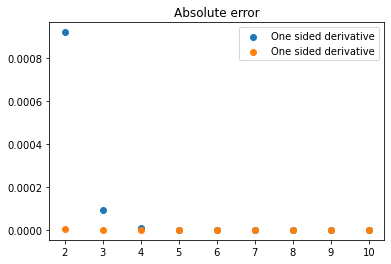

In [94]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_OSD)[1:], label="One sided derivative")
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_TSD)[1:], label="One sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

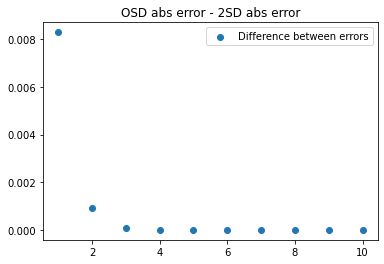

In [95]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10),np.abs(error_OSD) - np.abs(error_TSD), label="Difference between errors")
plt.title("OSD abs error - 2SD abs error")
plt.legend()
plt.show()

In [96]:
np.min(np.abs(error_OSD)), ϵ[np.argmin(np.abs(error_OSD))]

(8.742384205451259e-09, 1e-08)

In [97]:
np.min(np.abs(error_TSD)), ϵ[np.argmin(np.abs(error_TSD))]

(6.1732008393988735e-12, 1e-05)

The minimum absolute error for the one sided derivative is achieved when $\Delta=10^{-08}$. The minimum absolute error for the two sided derivative is achieved when $\Delta=10^{-05}$. At the minimum, the Two sided derivative has a smaller absolute error compare to the One sided derivative. For a more detailed discussion see the pdf attached.

Exercises 3 and 4:

Use the bisection, secant, and Newton's methods to compute an estimate of $p_0$, where $g\left(p_0\right)=$ $0.75$ (and $g$ is defined in the first problem). For each method, report how many iterations are required to compute an estimate $\hat{p}$ satisfying $\left|f(\hat{p})-f\left(p_0\right)\right|<10^{-6}$.

Repeat the last problem using Brent's method as described in Chapter $9.3$ of Numerical Recipes in Fortran.

In [98]:
def g_tilda(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2) - 0.75

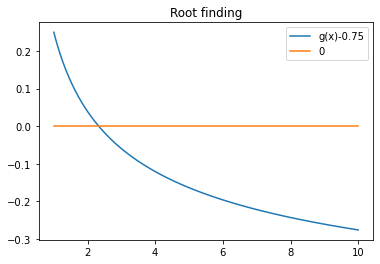

In [99]:
ax, fig = plt.subplots()
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100)), label="g(x)-0.75")
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100))*0, label="0")
plt.title("Root finding")
plt.legend()
plt.show()

In [100]:
precision = 10**(-6)

In [101]:
def secant(x0,x1,e,N):
    step = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0)*g_tilda(x0)/( g_tilda(x1) - g_tilda(x0) ) 
        x0 = x1
        x1 = x2
        step = step + 1
        if step > N:
            print('Max iter achieved')
            break
        condition = abs(g_tilda(x2)) > e
    print('Total Iterations ' + str( step))
    print('Root:' + str(x2))

In [102]:
secant(0.1,3,precision,100)

Total Iterations 6
Root:2.327576829233226


In [103]:
scipy.optimize.newton(g_prime, 0.1, fprime=None, args=(), tol=precision, maxiter=100, fprime2=None, x1=None, rtol=0.0, full_output=True, disp=True)

(2.3275801395267837,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 11
            root: 2.3275801395267837)

In [104]:
def Bisection(f, x_0, x_1, precision, steps): 
    
    if np.sign(f(x_0)) == np.sign(f(x_1)):
        raise Exception("Cannot bracket root")
    m = (x_0 + x_1)/2
    if np.abs(f(m)) < precision:
        return m, steps
    elif np.sign(f(x_0)) == np.sign(f(m)):
        return Bisection(f, m, x_1, precision, (steps + 1))
    elif np.sign(f(x_1)) == np.sign(f(m)):
        return Bisection(f, x_0, m, precision, (steps + 1))

In [105]:
Bisection(g_prime, 0.1, 3, precision, 0)

(2.3275806427001955, 17)

In [106]:
scipy.optimize.brentq(g_prime, 0.1, 3, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=True, disp=True)

(2.3275801395268103,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 2.3275801395268103)

Iterations needed to compute ${\hat{p}}$:

|Method|Iterations|
| ---- | ----     |
|Newton's      |     11     |
|Bisection     |    17     |
|Secant        |   6      |
|Brent's      |    8  |

For a detailed explanation about what each algorithm does see attached pdf. The 2 Methods that are always well defined are Brent's and the Bisection. BIsection method is in general the slowest. When working with well behaved functions, NW is the fastest algorithm. Brent combines all of the above with an inverse quadratic equation for iterations that satisfy certain conditions.